#### Importing Packages

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
import os


#### Assigning constants

In [57]:
TRAIN_DATA_PATH = './Dataset/Train'
VALID_DATA_PATH = './Dataset/Validation'
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 10

#### Data Augmentation and Loading

In [58]:
train_datagen = ImageDataGenerator(rescale=1./255
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # 2-class problem: real/fake
)

valid_generator = valid_datagen.flow_from_directory(
    VALID_DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


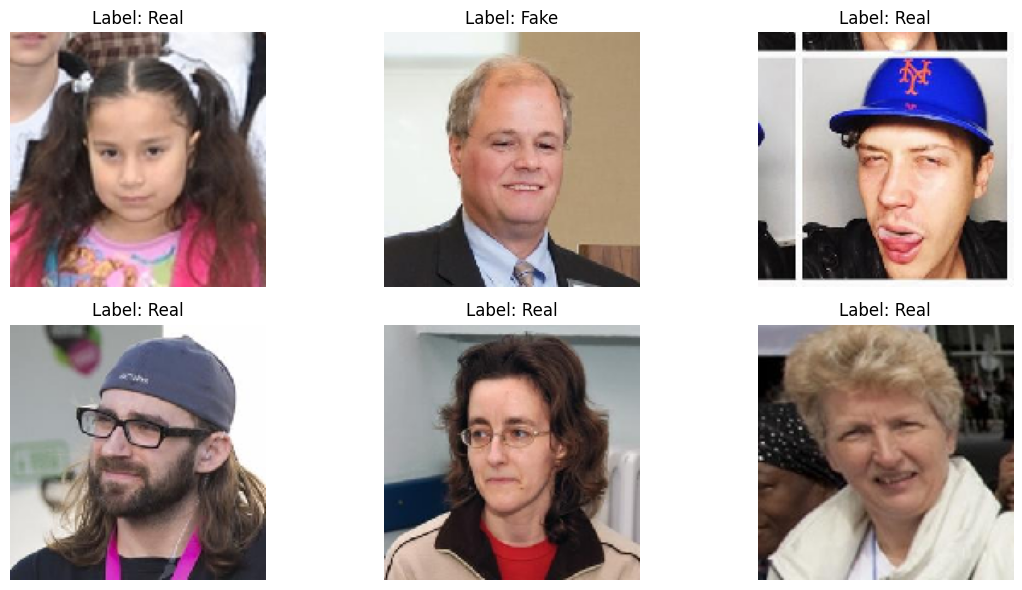

In [59]:
# Class mapping (example: {'Fake': 0, 'Real': 1})
class_names = list(train_generator.class_indices.keys())

# Get one batch from generator
images, labels = next(train_generator)

# Plot the first 6 images with labels
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    label_index = int(labels[i]) if labels[i] in [0, 1] else int(np.round(labels[i]))
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [60]:

# model = Sequential([
#     # First Block
#     Conv2D(128, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
#     Activation('relu'),
#     MaxPooling2D((2, 2)),

#     # Second Block
#     Conv2D(256, (3, 3), padding='same'),
#     Activation('relu'),
#     MaxPooling2D((2, 2)),

#     # Third Block
#     Conv2D(512, (3, 3), padding='same'),
#     Activation('relu'),
#     MaxPooling2D((2, 2)),

#     # Fourth Block
#     Conv2D(256, (3, 3), padding='same'),
#     MaxPooling2D((2, 2)),
#     Activation('relu'),

#     # Fifth Block
#     Conv2D(128, (3, 3), padding='same'),
#     Activation('relu'),
#     MaxPooling2D((2, 2)),

#     # Dense Layers
#     Flatten(),
#     Dense(512),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),

#     Dense(128),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),

#     # Output Layer
#     Dense(1, activation='sigmoid')
# ])

# model.summary()

In [61]:
# Prevent the model from over-training:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [62]:
# --- CNN Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    # Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
# Train
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 831s 190ms/step - accuracy: 0.7993 - loss: 0.4037 - val_accuracy: 0.9008 - val_loss: 0.2294
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 591s 135ms/step - accuracy: 0.9343 - loss: 0.1592 - val_accuracy: 0.9161 - val_loss: 0.1962
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 586s 134ms/step - accuracy: 0.9496 - loss: 0.1255 - val_accuracy: 0.9246 - val_loss: 0.1839
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 588s 134ms/step - accuracy: 0.9569 - loss: 0.1069 - val_accuracy: 0.9296 - val_loss: 0.1757
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 584s 133ms/step - accuracy: 0.9643 - loss: 0.0893 - val_accuracy: 0.9337 - val_loss: 0.1702
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 624s 143ms/step - accuracy: 0.9686 - loss: 0.0795 - val_accuracy: 0.9333 - val_loss: 0.1866
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 629s 144ms/step - accuracy: 0.9718 - loss: 0.0688 - val_accuracy: 0.9347 - val_loss: 0.1793
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 602s 138ms/step - ac

In [65]:
# Evaluate
loss, acc = model.evaluate(valid_generator)
print(f"Validation Accuracy: {acc:.4f}")

1233/1233 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.9341 - loss: 0.1705
Validation Accuracy: 0.9337


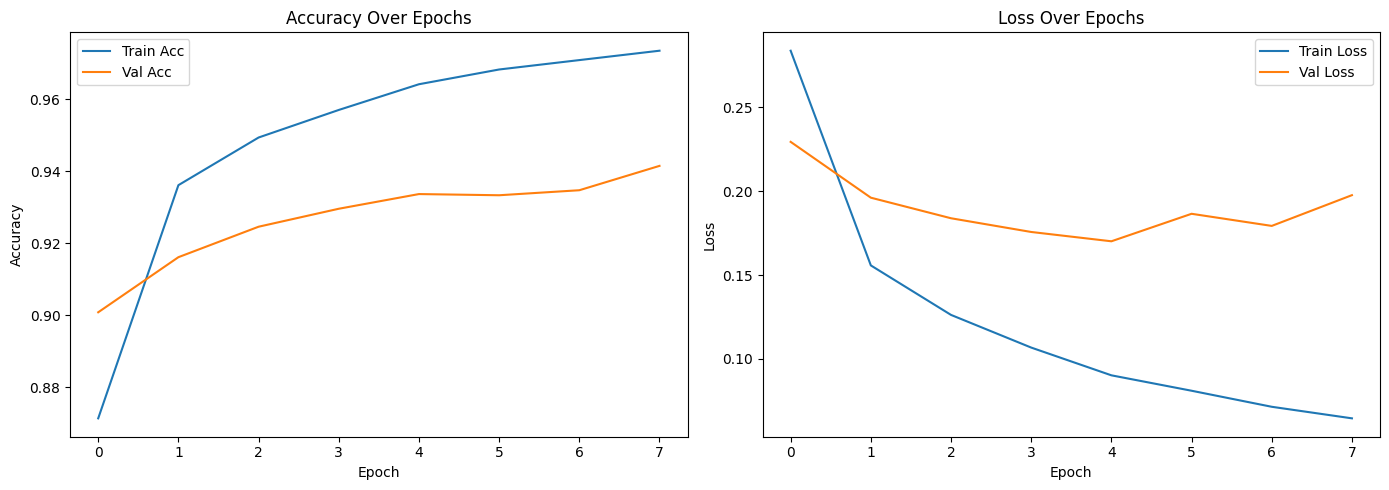

In [68]:
# Plot accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


1233/1233 ━━━━━━━━━━━━━━━━━━━━ 54s 44ms/step


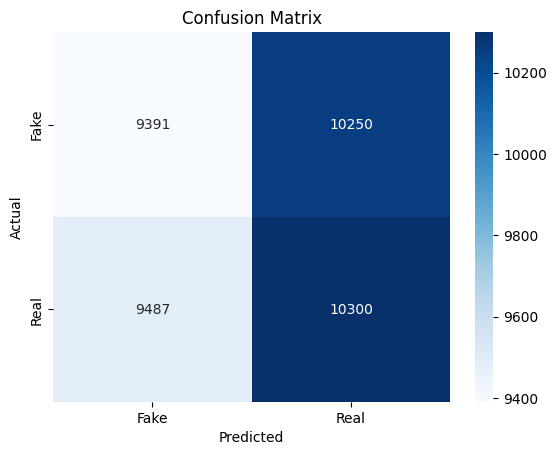

Classification Report:
               precision    recall  f1-score   support

        Fake       0.50      0.48      0.49     19641
        Real       0.50      0.52      0.51     19787

    accuracy                           0.50     39428
   macro avg       0.50      0.50      0.50     39428
weighted avg       0.50      0.50      0.50     39428



In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(valid_generator) > 0.5).astype("int32")
y_true = valid_generator.classes

# Get true labels and predicted labels
# y_true = []
# y_pred = []

# for images, labels in valid_generator:
#     preds = model.predict(images)
#     y_true.extend(labels)
#     y_pred.extend((preds > 0.5).astype(int).flatten())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=["Fake", "Real"]))
